/Users/vladlen/sp/modules_py/proc_data.py:4: UserWarning: genfromtxt: Empty input file: "./graph_data/eq_pnd/1.490_/graph_data_1.490_3.txt"
  data = np.genfromtxt(filename);


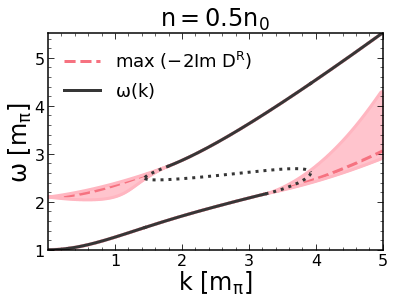

In [9]:
import modules_py.functions as f
import modules_py.functions_vec as fv
import modules_py.proc_image as pi
import modules_py.aux as aux

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('publication23.mplstyle')

f.M = 6.67
pf = 1.49
fv.k = np.r_[1e-9:5:2500j]
fv.w = np.r_[0:6:2500j]

def d_pnd_w_imag(k, w):
    return 2 * f.d_pnd(k, w, pf).imag

K, W = np.meshgrid(fv.k, fv.w)
F = d_pnd_w_imag(K, W)
_, F_lower = aux.split(K, W, F, .5, 1.4)
F_upper, _ = aux.split(K, W, F, .03, 2.1)

_, F_lower_bound = aux.split(K, W, F, .5, 1.8)
F_upper_bound, _ = aux.split(K, W, F, .2, 1.7)

w_upper = np.array([])
w_upper_bound_upper = np.array([])
w_upper_bound_lower = np.array([])
for k_index in range(0, len(K[0, :])):
    w_index = np.argmax(F_upper[:, k_index])
    w_upper_bound_upper = np.append(w_upper_bound_upper,
        W[(F_upper_bound[:, k_index] > 1 / 3 * F_upper_bound[w_index, k_index]), 0][-1])
    w_upper_bound_lower = np.append(w_upper_bound_lower,
        W[(F_upper_bound[:, k_index] > 1 / 3 * F_upper_bound[w_index, k_index]), 0][0])
    w_upper = np.append(w_upper, W[w_index, 0])

w_lower = np.array([])
w_lower_bound_upper = np.array([])
w_lower_bound_lower = np.array([])
for k_index in range(0, len(K[0, :])):
    w_index = np.argmax(F_lower[:, k_index])
    w_lower_bound_upper = np.append(w_lower_bound_upper,
        W[(F_lower_bound[:, k_index] > 1 / 3 * F_lower_bound[w_index, k_index]), 0][-1])
    w_lower_bound_lower = np.append(w_lower_bound_lower,
        W[(F_lower_bound[:, k_index] > 1 / 3 * F_lower_bound[w_index, k_index]), 0][0])
    w_lower = np.append(w_lower, W[w_index, 0])

color_soft_pink = '#f67280'
color_dark_grey = '#363636'
color_ligh_pink = '#ffb6c1'
alpha_fill_bound = .8

%matplotlib inline

line_max_d = plt.plot(fv.k, w_upper, label=r'max ($-2$Im $D^R$)',
    ls='dashed', color=color_soft_pink)
line_max_d_bound = plt.plot(fv.k[10:], w_upper_bound_upper[10:],
    color=color_ligh_pink)
plt.plot(fv.k[20:], w_upper_bound_lower[20:],
    color=line_max_d_bound[0].get_color())
plt.fill_between(fv.k[20:], w_upper_bound_upper[20:],
    w_upper_bound_lower[20:], color=color_ligh_pink, alpha=alpha_fill_bound)

plt.plot(fv.k, w_lower, ls='dashed', color=line_max_d[0].get_color())
plt.plot(fv.k, w_lower_bound_upper, color=line_max_d_bound[0].get_color())
plt.plot(fv.k, w_lower_bound_lower, color=line_max_d_bound[0].get_color())
plt.fill_between(fv.k[20:], w_lower_bound_upper[20:],
    w_lower_bound_lower[20:], color=color_ligh_pink, alpha=alpha_fill_bound)

pi.plot_new('./graph_data/eq_pnd/1.490_', pf, label=r'$\omega(k)$', color=color_dark_grey)

# plt.plot(fv.k, fv.w_as(fv.k, pf, branch=1), color=color_dark_grey,
#     label=r'$\omega^{(as)}(k)$', ls='dotted')
# plt.plot(fv.k, fv.w_as(fv.k, pf, branch=-1), color=color_dark_grey, ls='dotted')

plt.title(r'$n = %.1f n_0$' % f.n(pf))
plt.xlabel(r'$k$ $[m_\pi]$')
plt.ylabel(r'$\omega$ $[m_\pi]$')
plt.legend(frameon=False)

plt.savefig('/Users/vladlen/Desktop/slides/figures/eq_pnd_best_%.1f_.jpg' % f.n(pf), dpi=300, format='jpg', bbox_inches='tight')
# plt.savefig('figures/eq/eq_pnd_best_%.1f.pdf' % f.n(pf), dpi=300, format='pdf', bbox_inches='tight')
plt.show()